# Tutorial

## Monte Carlo Simulation

## for American Options

(c) 2017 Martin Guggisberg

## ToDo

1. [ X ] relevant literature
1. [   ] 1-dim Wiener process
1. [   ] n-dim Wiener process
1. [   ] Regression -> estimating density probability function
1. [   ] Regression: using different basis functions
1. [   ] standard SDE Discretization 
1. [   ] using different SDE discretizations
1. [   ] comparing results with experiments from literature
1. [   ] using simulated anealing for regression
1. [   ]

## Literature

### Articles
    - XX

### Books
- Hilpisch, Y. (2015). [Derivatives Analytics with Python: Data Analysis, Models, Simulation, Calibration and Hedging](http://dawp.tpq.io/). John Wiley & Sons.
- Hilpisch, Y. (2014). [Python for Finance: Analyze Big Financial Data](http://pff.tpq.io/). " O'Reilly Media, Inc.".

Black-Scholes-Merton(1973)

$$ S_T = S_0 \cdot e^{(r-\frac{1}{2}\cdot \sigma^2) \cdot T + \sigma \cdot \sqrt{T}\cdot z)} $$

In [36]:
# parameters
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [172]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
I = 100000

z = np.random.standard_normal(I)
ST = S0 * (exp(r-0.5*sigma**2)*T+sigma*sqrt(T)*z)
hT = maximum(ST - K,0)
C0 = exp(-r * T) * sum(hT) / I
print ("VAlue of the European Call Option %5.3f" % C0)

# show random numbers I
#hist, bins = np.histogram(z, bins=40)
#width = 0.65* (bins[1] - bins[0])
#center = (bins[:-1] + bins[1:]) / 2
#plt.bar(center, hist, align='center', width=width)


VAlue of the European Call Option 6.664


In [173]:
#
# Monte Carlo valuation of European call options with pure Python
# mcs_pure_python.py
#

from time import time
from math import exp, sqrt, log
from random import gauss, seed

seed(20000)
t0 = time()

# Parameters
S0 = 100.  # initial value
K = 105.  # strike price
T = 1.0  # maturity
r = 0.05  # riskless short rate
sigma = 0.2  # volatility
M = 50  # number of time steps
dt = T / M  # length of time interval
I = 250000  # number of paths

# Simulating I paths with M time steps
S = []
for i in range(I):
    path = []
    for t in range(M + 1):
        if t == 0:
            path.append(S0)
        else:
            z = gauss(0.0, 1.0)
            St = path[t - 1] * exp((r - 0.5 * sigma ** 2) * dt
                                  + sigma * sqrt(dt) * z)
            path.append(St)
    S.append(path)
    
# Calculating the Monte Carlo estimator
C0 = exp(-r * T) * sum([max(path[-1] - K, 0) for path in S]) / I

# Results output
tpy = time() - t0
print("European Option Value %7.3f" % C0)
print("Duration in Seconds   %7.3f" % tpy)

European Option Value   7.999
Duration in Seconds    36.981


### 1-dim Wiener process

''

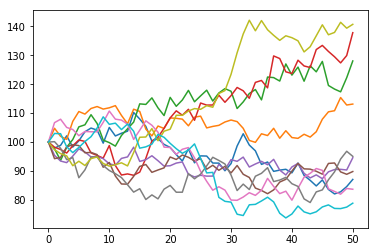

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    plt.plot(S[i])
""

### Vectorization


In [185]:
#
# Monte Carlo valuation of European call options with NumPy (log version)
# mcs_full_vector_numpy.py
#
import math
from numpy import *
from time import time
  # star import for shorter code

random.seed(20000)
t0 = time()

# Parameters
S0 = 100.; K = 105.; T = 1.0; r = 0.05; sigma = 0.2
M = 50; dt = T / M; I = 250000

# Simulating I paths with M time steps
S = S0 * exp(cumsum((r - 0.5 * sigma ** 2) * dt
            + sigma * math.sqrt(dt) 
                    * random.standard_normal((M + 1, I)), axis=0))
  # sum instead of cumsum would also do
  # if only the final values are of interest
S[0] = S0
    
# Calculating the Monte Carlo estimator
C0 = math.exp(-r * T) * sum(maximum(S[-1] - K, 0)) / I

# Results output
tnp2 = time() - t0
print("European Option Value %7.3f" % C0)
print("Duration in Seconds   %7.3f" % tnp2)

European Option Value   8.166
Duration in Seconds     1.141


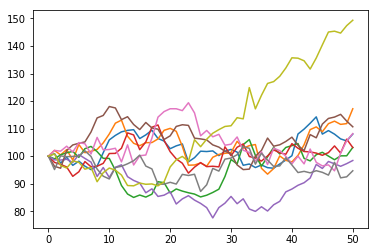

In [188]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(S[:, :9])

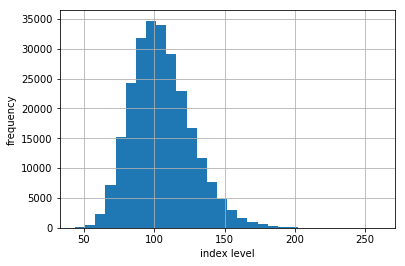

In [190]:
plt.hist(S[-1],bins=30)
plt.grid(True)
plt.xlabel('index level')
plt.ylabel('frequency')

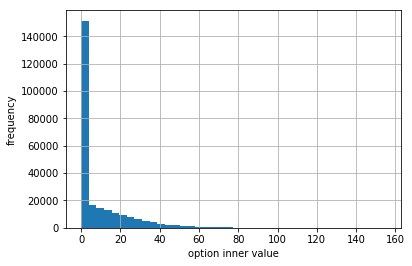

In [191]:
plt.hist(np.maximum(S[-1]-K,0),bins=40)
plt.grid(True)
plt.xlabel('option inner value')
plt.ylabel('frequency')

## Regression / Approximation


$$
min_{\alpha_1,\cdots,\alpha_D}  \frac{1}{I} \sum^{I}_{i=1} (y_i - \sum^{D}_{d=1} a_d \cdot b_d(x))^2
$$


In [192]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
def f(x):
    return np.sin(x) + 0.5 * x

In [194]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

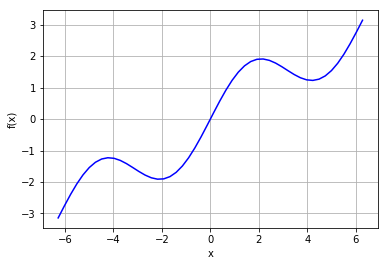

In [195]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')


In [197]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

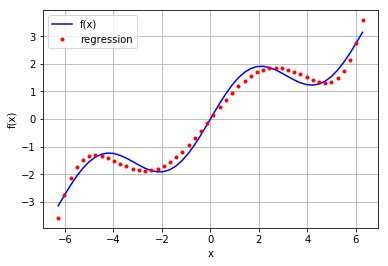

In [198]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

### Definition of basics functions

In [208]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [214]:
matrix[3, :] = np.sin(x)

In [209]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

In [210]:
reg

array([  9.26243218e-17,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

In [211]:
ry = np.dot(reg, matrix)

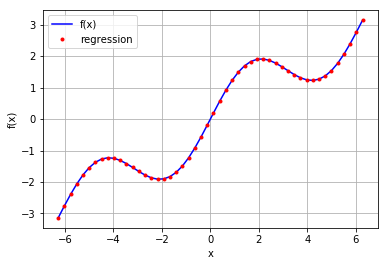

In [212]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [213]:
np.allclose(f(x), ry)

True